In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
df=pd.read_csv(r"C:\Users\garim\Downloads\Attrition data.csv")

In [118]:
df

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,4409,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [119]:
df.shape

(4410, 29)

In [122]:
df.dtypes[df.dtypes=="object"].index

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18'],
      dtype='object')

In [123]:
df.dtypes[df.dtypes!="object"].index

Index(['EmployeeID', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

In [124]:
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

# Null Values

In [125]:
df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [126]:
df.dropna(inplace=True)

In [127]:
df.isnull().sum()

EmployeeID                 0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

# Statistical tests to check relation with target variable

# Chi square for var-var

In [128]:
from scipy import stats

In [129]:
dg=[]
for i in var:
    ct=pd.crosstab(df[i], df["Attrition"])
    p=stats.chi2_contingency(ct)[1]
    if p<0.05:
      print(f"There is Relationship with {i}")
      dg.append((i,df["Attrition"]))

There is Relationship with Attrition
There is Relationship with BusinessTravel
There is Relationship with Department
There is Relationship with EducationField
There is Relationship with JobRole
There is Relationship with MaritalStatus


In [130]:
df["Attrition"].value_counts()

Attrition
No     3605
Yes     695
Name: count, dtype: int64

In [131]:
df["Attrition"].value_counts().values

array([3605,  695], dtype=int64)

# Department and Attrition

In [132]:
abc=pd.DataFrame(df.groupby("Department")["Attrition"].value_counts(normalize=True))

In [133]:
abc

proportion
Department             Attrition            
Human Resources        No           0.709677
                       Yes          0.290323
Research & Development No           0.842180
                       Yes          0.157820
Sales                  No           0.848508
                       Yes          0.151492

In [134]:
abc_reset = abc.reset_index()

In [50]:
abc_reset

,Department,Attrition,proportion
0,Human Resources,No,0.709677
1,Human Resources,Yes,0.290323
2,Research & Development,No,0.842180
3,Research & Development,Yes,0.157820
4,Sales,No,0.848508
5,Sales,Yes,0.151492


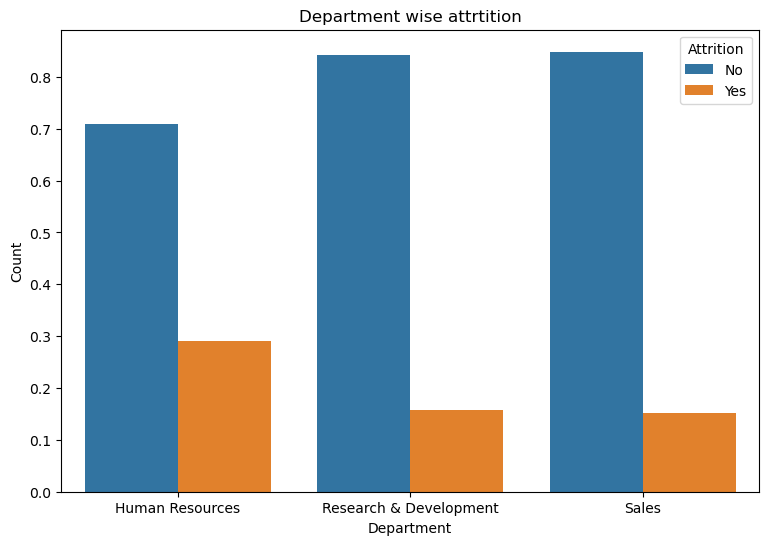

In [53]:
plt.figure(figsize=(9,6))
sns.barplot(x=abc_reset["Department"],y=abc_reset["proportion"], hue=abc_reset["Attrition"])
plt.title("Department wise attrtition")
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()
    

# Business Travel and Attrition

In [54]:
df.groupby("BusinessTravel")["Attrition"].value_counts(normalize=True)

BusinessTravel     Attrition
Non-Travel         No           0.918182
                   Yes          0.081818
Travel_Frequently  No           0.754017
                   Yes          0.245983
Travel_Rarely      No           0.849230
                   Yes          0.150770
Name: proportion, dtype: float64

In [55]:
xyz=pd.DataFrame(df.groupby("BusinessTravel")["Attrition"].value_counts(normalize=True))

In [56]:
xyz=xyz.reset_index()

In [57]:
xyz

,BusinessTravel,Attrition,proportion
0,Non-Travel,No,0.918182
1,Non-Travel,Yes,0.081818
2,Travel_Frequently,No,0.754017
3,Travel_Frequently,Yes,0.245983
4,Travel_Rarely,No,0.849230
5,Travel_Rarely,Yes,0.150770


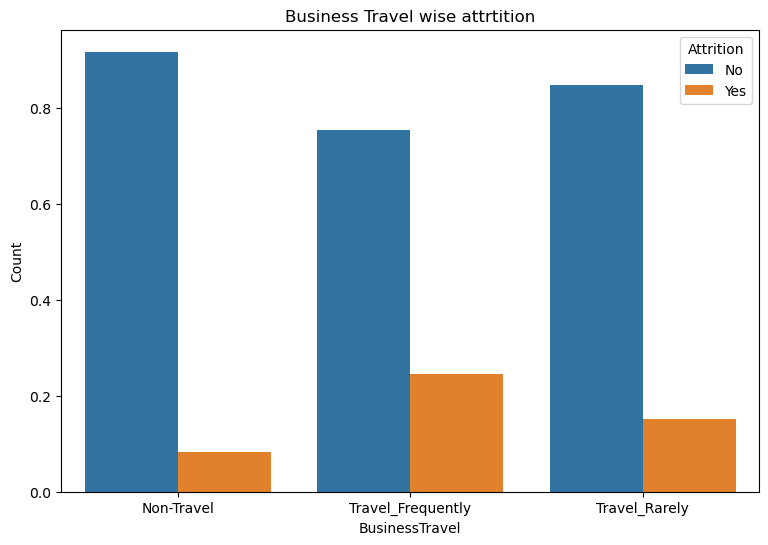

In [58]:
plt.figure(figsize=(9,6))
sns.barplot(x=xyz["BusinessTravel"],y=xyz["proportion"], hue=abc_reset["Attrition"])
plt.title("Business Travel wise attrtition")
plt.xlabel("BusinessTravel")
plt.ylabel("Count")
plt.show()

# Education Field And Attrition

In [76]:
df.groupby("EducationField")["Attrition"].value_counts(normalize=True)
    

EducationField    Attrition
Human Resources   No           0.600000
                  Yes          0.400000
Life Sciences     No           0.832956
                  Yes          0.167044
Marketing         No           0.842217
                  Yes          0.157783
Medical           No           0.839443
                  Yes          0.160557
Other             No           0.873418
                  Yes          0.126582
Technical Degree  No           0.882812
                  Yes          0.117188
Name: proportion, dtype: float64

In [77]:
pqr=pd.DataFrame(df.groupby("EducationField")["Attrition"].value_counts(normalize=True))

In [78]:
pqr=pqr.reset_index()

In [79]:
pqr

,EducationField,Attrition,proportion
0,Human Resources,No,0.600000
1,Human Resources,Yes,0.400000
2,Life Sciences,No,0.832956
3,Life Sciences,Yes,0.167044
4,Marketing,No,0.842217
5,Marketing,Yes,0.157783
6,Medical,No,0.839443
7,Medical,Yes,0.160557
8,Other,No,0.873418
9,Other,Yes,0.126582


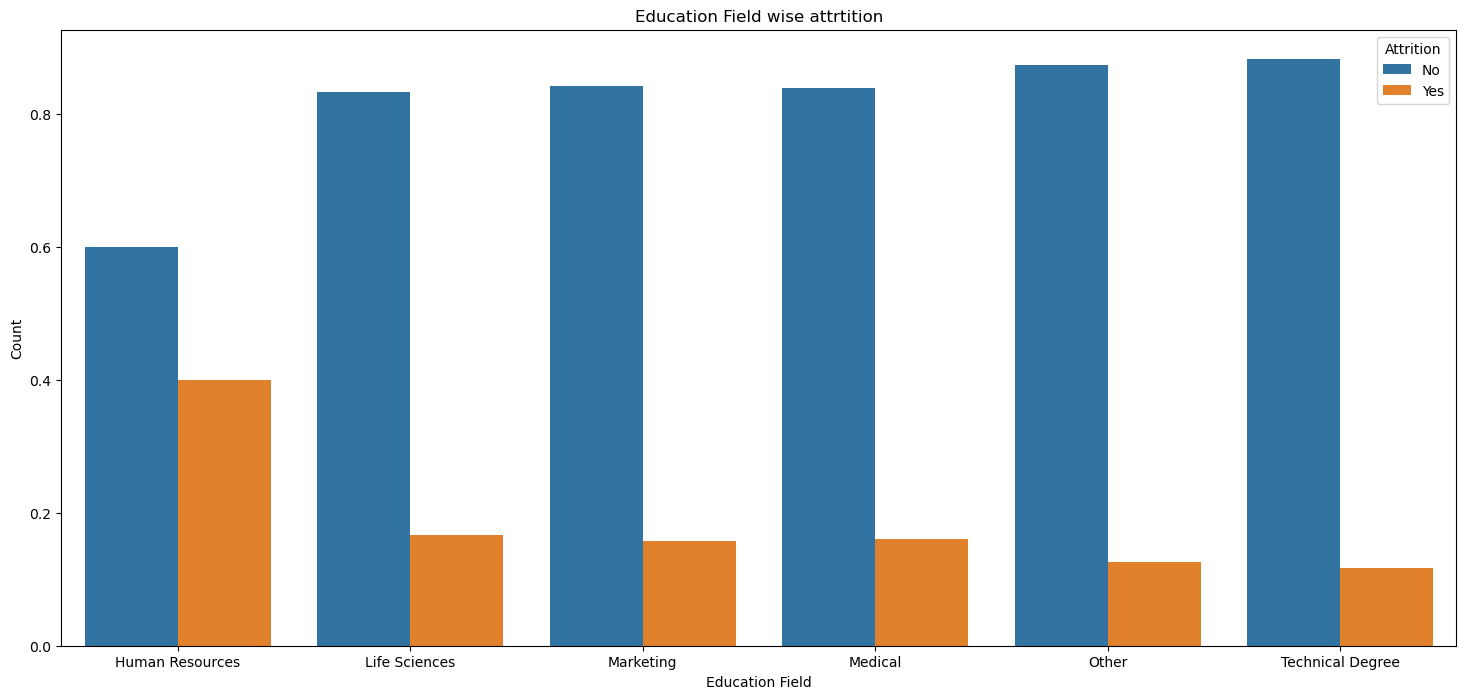

In [87]:
plt.figure(figsize=(18,8))
sns.barplot(x=pqr["EducationField"],y=pqr["proportion"], hue=pqr["Attrition"])
plt.title("Education Field wise attrtition")
plt.xlabel("Education Field")
plt.ylabel("Count")
plt.show()

# Job roll and Attrition

In [89]:
df.groupby("EducationField")["Attrition"].value_counts(normalize=True)

EducationField    Attrition
Human Resources   No           0.600000
                  Yes          0.400000
Life Sciences     No           0.832956
                  Yes          0.167044
Marketing         No           0.842217
                  Yes          0.157783
Medical           No           0.839443
                  Yes          0.160557
Other             No           0.873418
                  Yes          0.126582
Technical Degree  No           0.882812
                  Yes          0.117188
Name: proportion, dtype: float64

In [95]:
ab=pd.DataFrame(df.groupby("JobRole")["Attrition"].value_counts(normalize=True))

In [96]:
ab=ab.reset_index()

In [97]:
ab

,JobRole,Attrition,proportion
0,Healthcare Representative,No,0.854111
1,Healthcare Representative,Yes,0.145889
2,Human Resources,No,0.863636
3,Human Resources,Yes,0.136364
4,Laboratory Technician,No,0.838838
5,Laboratory Technician,Yes,0.161162
6,Manager,No,0.869565
7,Manager,Yes,0.130435
8,Manufacturing Director,No,0.886256
9,Manufacturing Director,Yes,0.113744


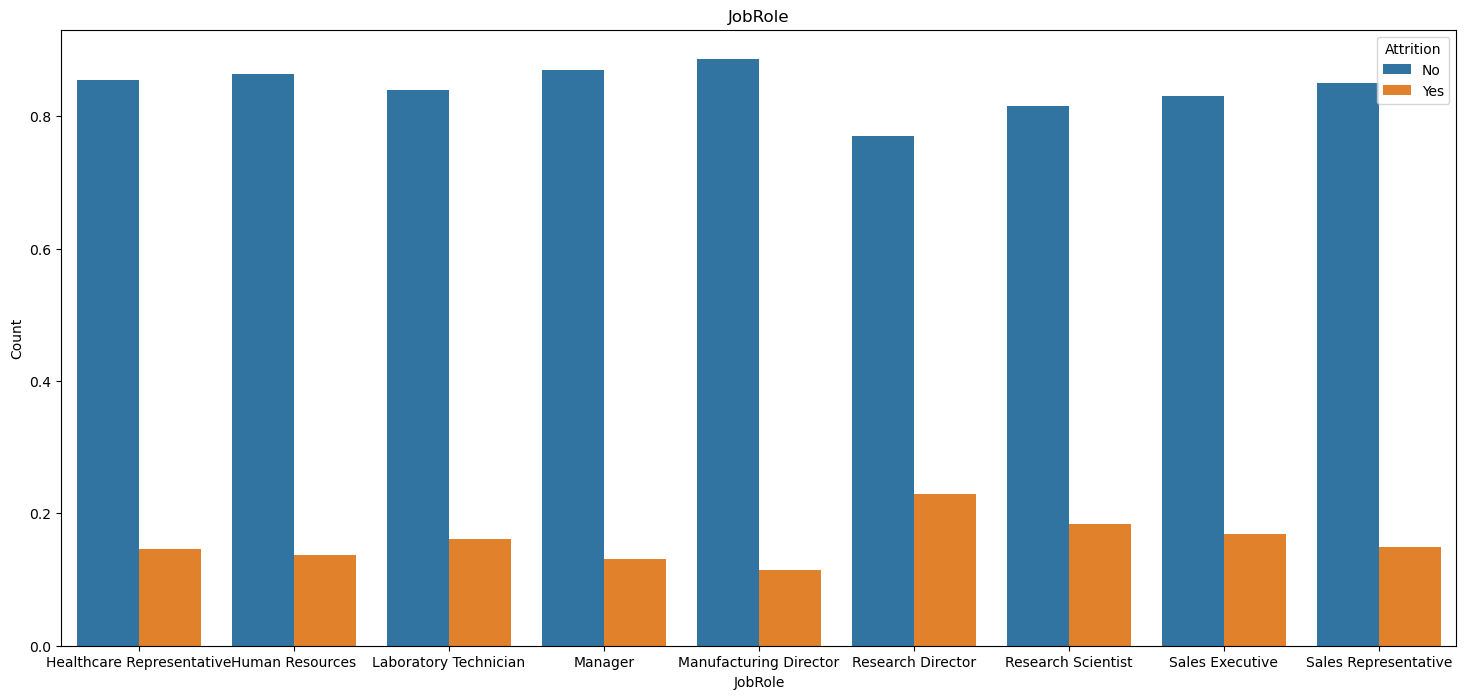

In [98]:
plt.figure(figsize=(18,8))
sns.barplot(x=ab["JobRole"],y=ab["proportion"], hue=ab["Attrition"])
plt.title("JobRole")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.show()

# Marital Status and Attrition

In [99]:
df.groupby("MaritalStatus")["Attrition"].value_counts(normalize=True)

MaritalStatus  Attrition
Divorced       No           0.900948
               Yes          0.099052
Married        No           0.872524
               Yes          0.127476
Single         No           0.746744
               Yes          0.253256
Name: proportion, dtype: float64

In [100]:
ab=pd.DataFrame(df.groupby("MaritalStatus")["Attrition"].value_counts(normalize=True))

In [101]:
ab=ab.reset_index()

In [102]:
ab

,MaritalStatus,Attrition,proportion
0,Divorced,No,0.900948
1,Divorced,Yes,0.099052
2,Married,No,0.872524
3,Married,Yes,0.127476
4,Single,No,0.746744
5,Single,Yes,0.253256


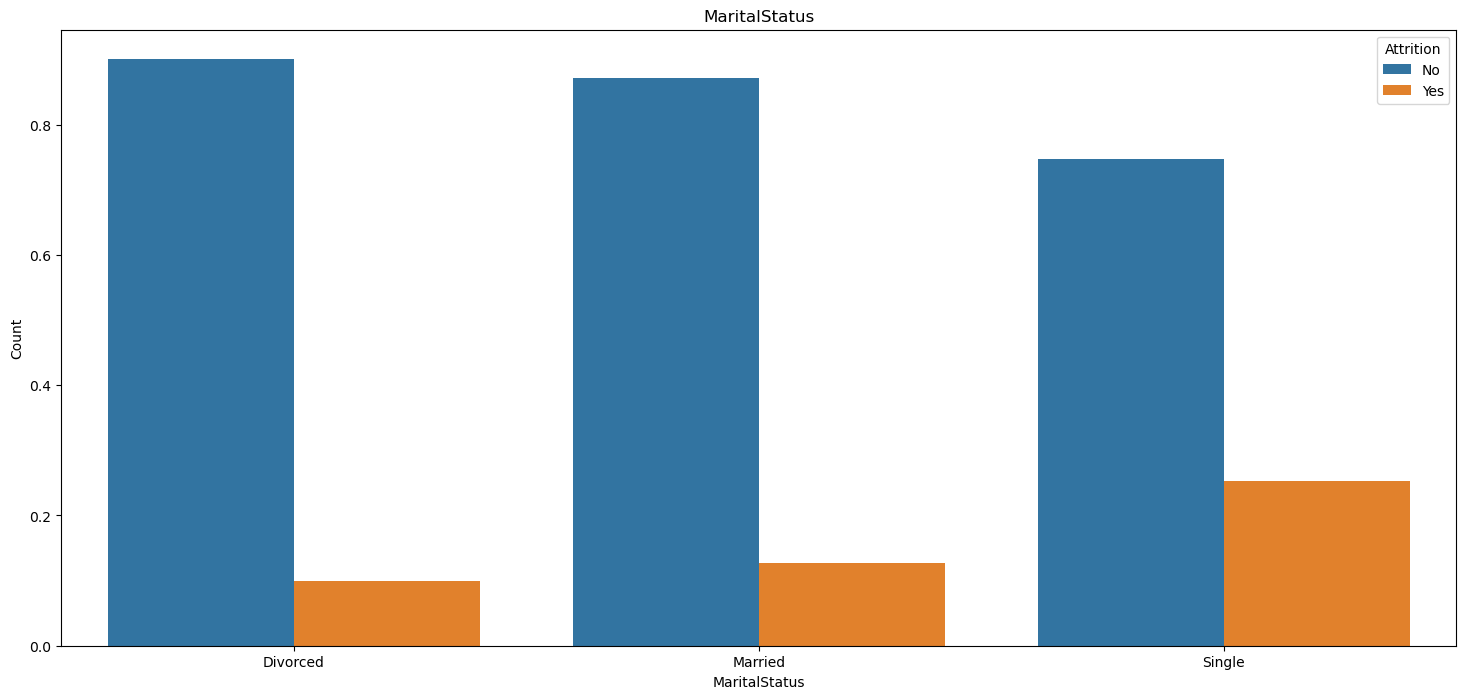

In [103]:
plt.figure(figsize=(18,8))
sns.barplot(x=ab["MaritalStatus"],y=ab["proportion"], hue=ab["Attrition"])
plt.title("MaritalStatus")
plt.xlabel("MaritalStatus")
plt.ylabel("Count")
plt.show()

In [7]:
# Univariate Analysis

In [1]:
var=['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18']

In [2]:
num=['EmployeeID', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']

In [10]:
data=df

In [11]:
def univariate_num(data, x, is_plot=True, box_plot=True):

  mn=data[x].min()
  mx=data[x].max()
  range=mx-mn
  mean=data[x].mean()
  std=data[x].std()
  var=data[x].var()
  kurt=data[x].kurt()
  skew=data[x].skew()
  p1=data[x].quantile(.1)
  p2=data[x].quantile(.2)
  p25=data[x].quantile(.25)
  p5=data[x].quantile(.5)
  p75=data[x].quantile(.75)
  p90=data[x].quantile(.9)
  p95=data[x].quantile(.95)
  p99=data[x].quantile(.99)
  missing=data[x].isnull().sum()
  df1=pd.DataFrame({"min":[mn], "max":[mx], "range":[range], "mean":[mean],
                   "std":[std], "var":[var], "kurtosis":[kurt],
                   "skewness":[skew],"p10":[p1], "p20":[p2],"p25":[p25],"P50":[p5],
                   "p75":[p75], "p90":[p90], "p95":[p95], "p99":[p99],
                   "Missing_count":[missing]
                   })
  if is_plot:
    plt.figure(figsize=(6,3))
    sns.histplot(data=data, x=x, kde=True)
    plt.show()
  if box_plot:
    plt.figure(figsize=(6,3))
    plt.boxplot(data[x])
    plt.show()
  return df1

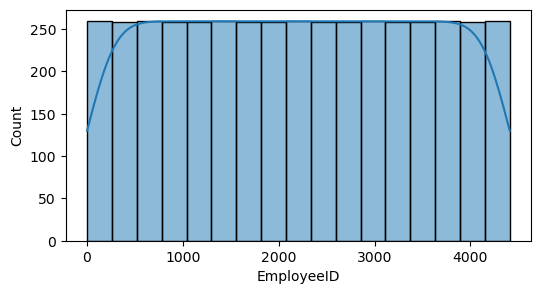

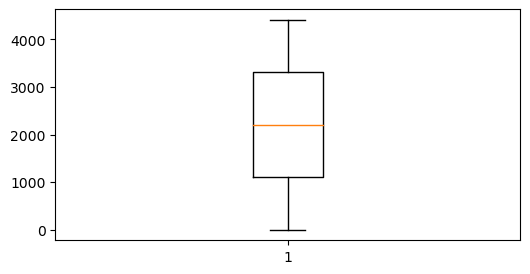

Results for {i}----------------


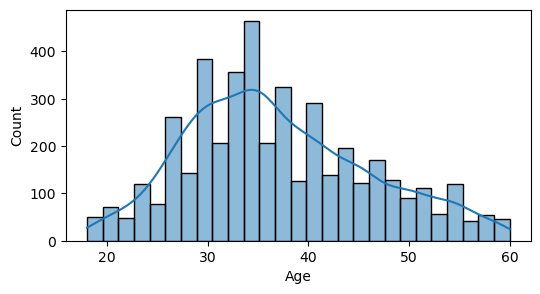

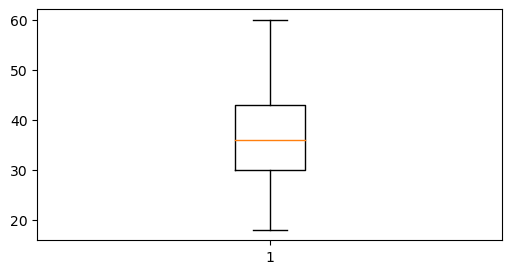

Results for {i}----------------


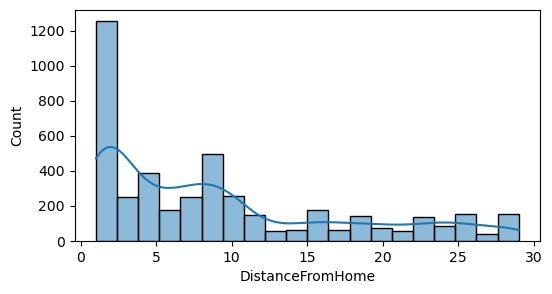

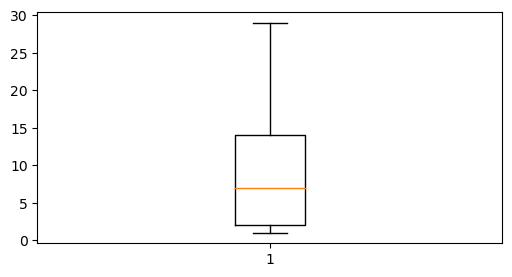

Results for {i}----------------


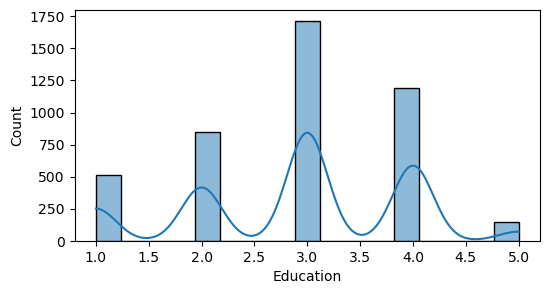

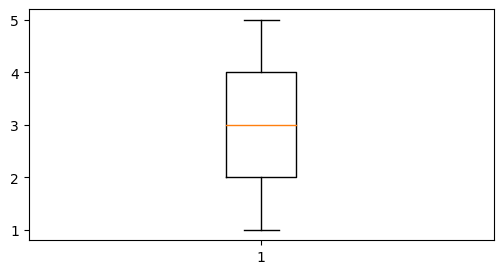

Results for {i}----------------


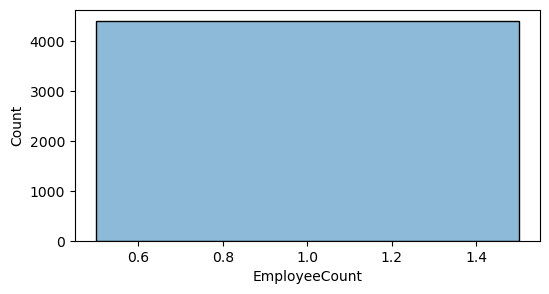

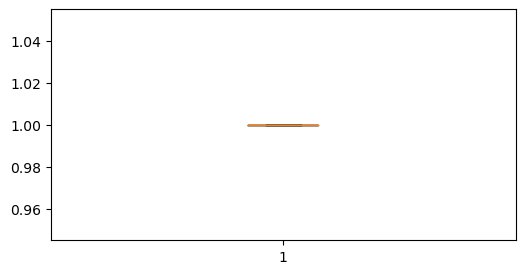

Results for {i}----------------


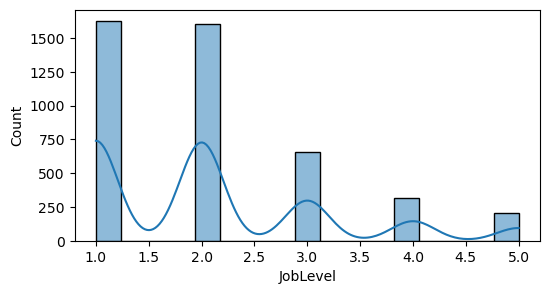

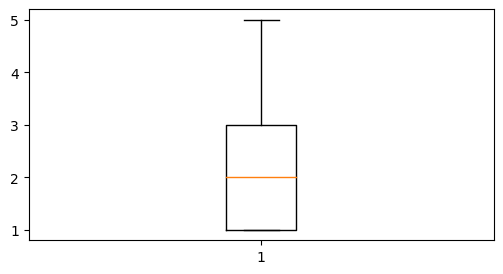

Results for {i}----------------


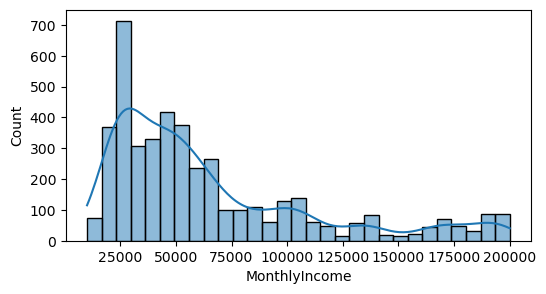

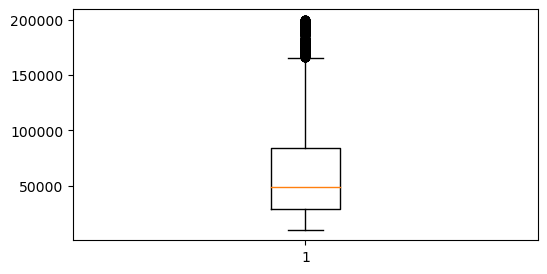

Results for {i}----------------


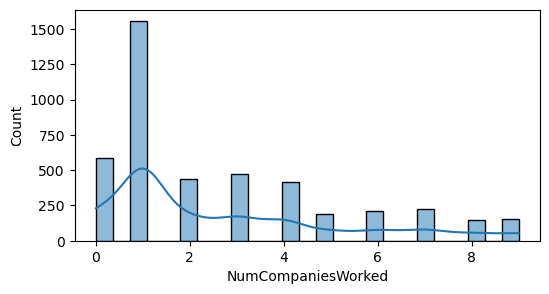

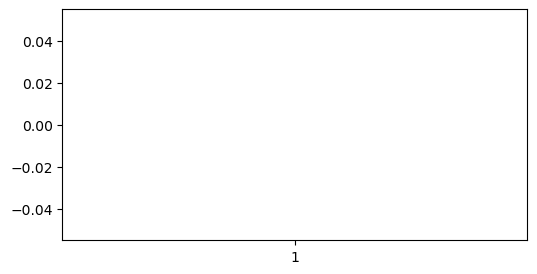

Results for {i}----------------


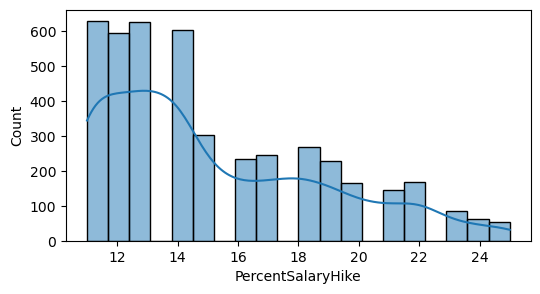

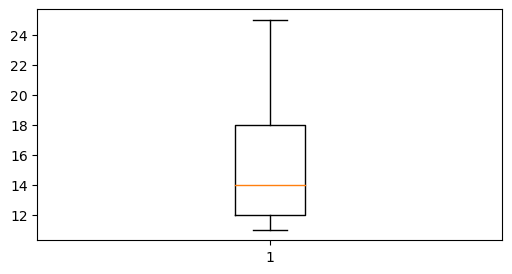

Results for {i}----------------


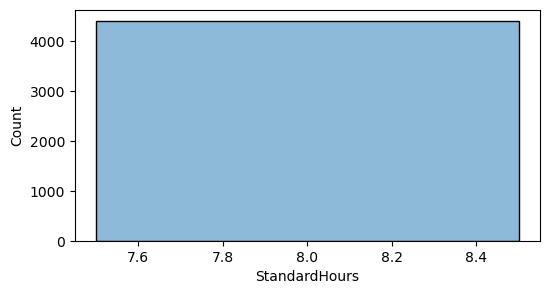

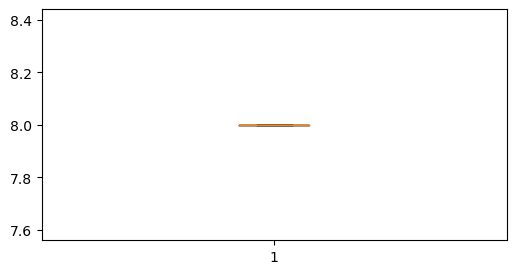

Results for {i}----------------


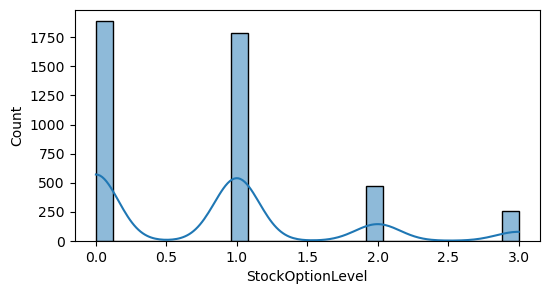

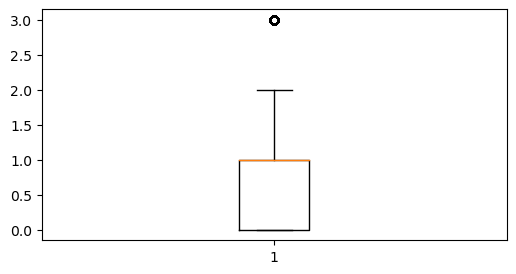

Results for {i}----------------


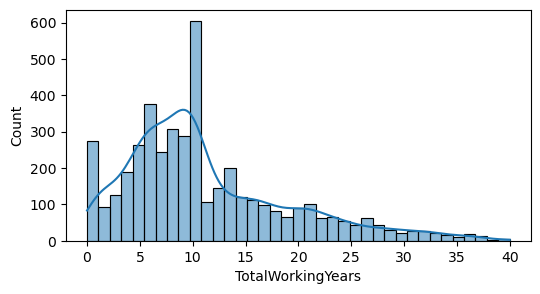

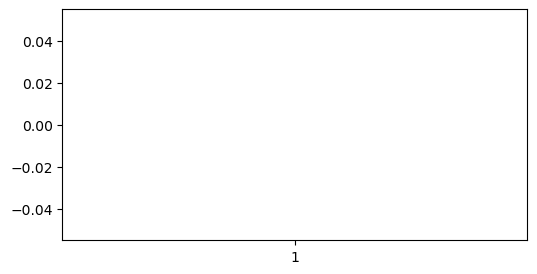

Results for {i}----------------


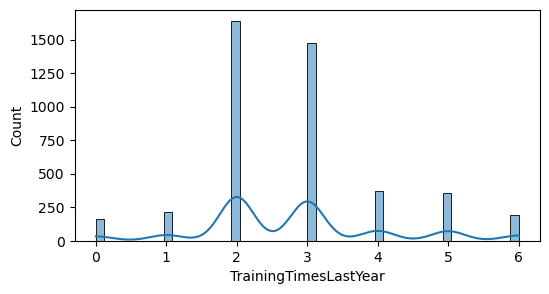

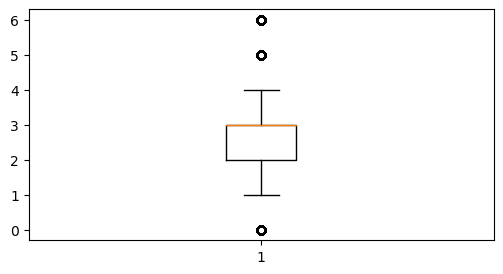

Results for {i}----------------


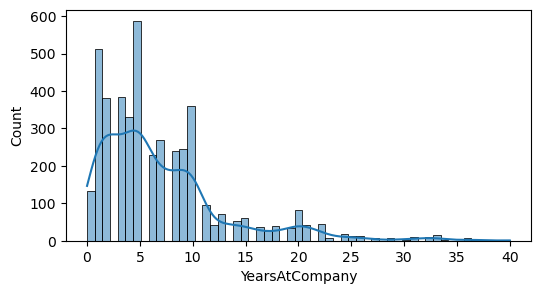

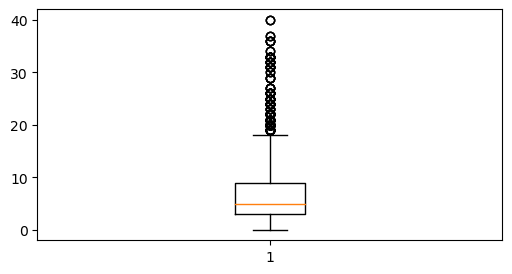

Results for {i}----------------


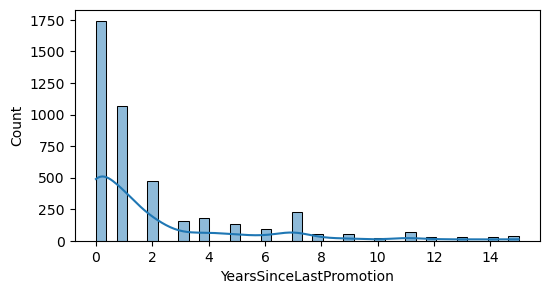

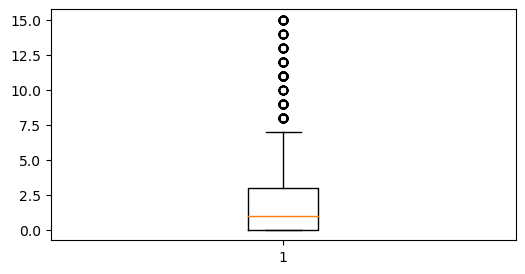

Results for {i}----------------


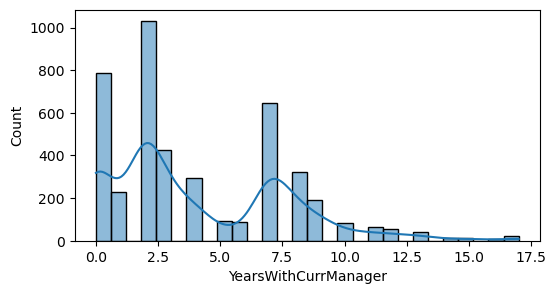

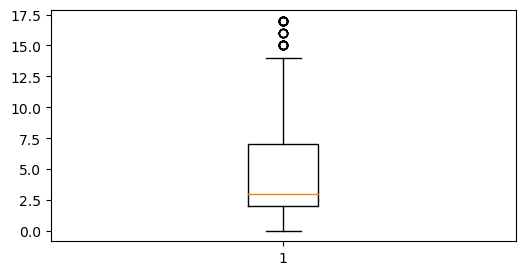

Results for {i}----------------


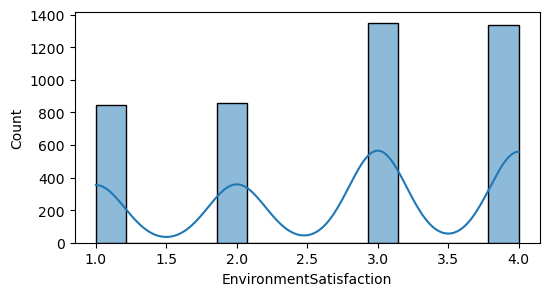

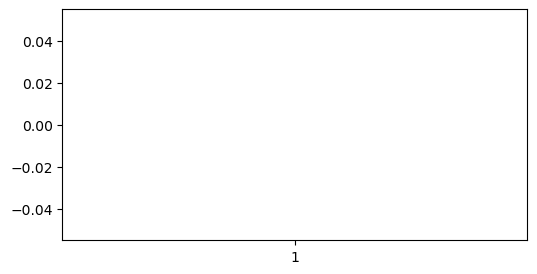

Results for {i}----------------


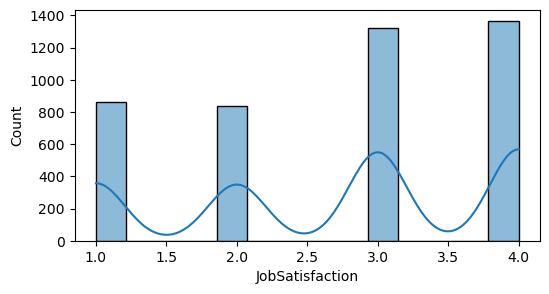

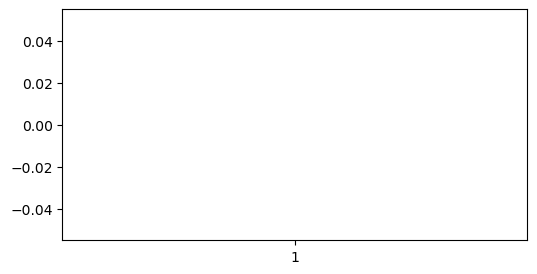

Results for {i}----------------


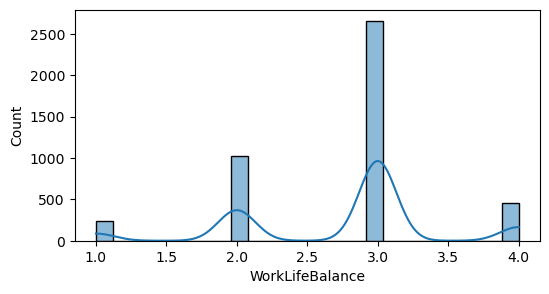

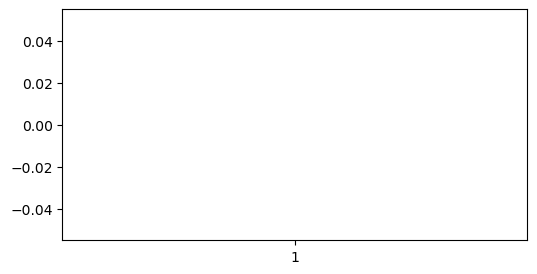

Results for {i}----------------


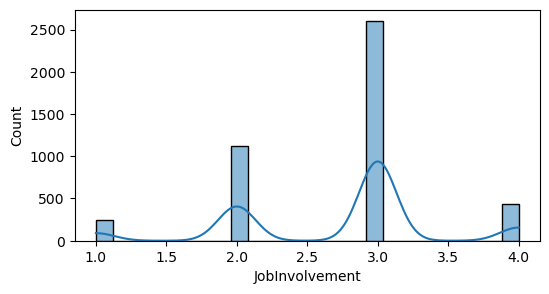

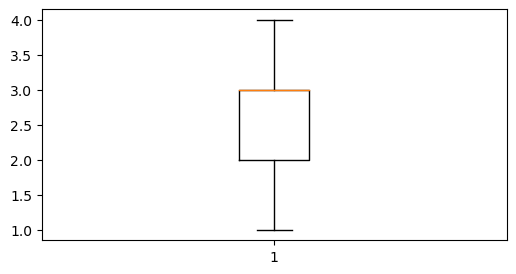

Results for {i}----------------


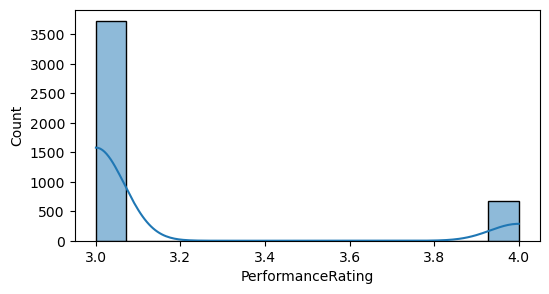

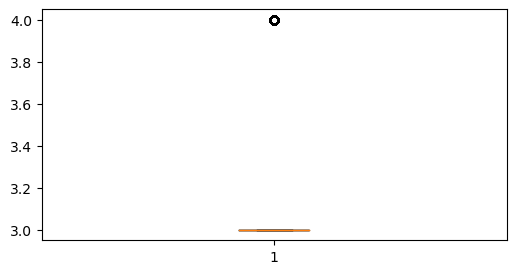

Results for {i}----------------


In [12]:
for i in num:
  univariate_num(df,x=i)
  print("Results for {i}----------------")

In [104]:
df[num]

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,6,2,1,1,131160,1.0,11,8,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,10,1,1,1,41890,0.0,23,8,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,17,4,1,4,193280,1.0,15,8,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,2,5,1,3,83210,3.0,11,8,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,10,1,1,1,23420,4.0,12,8,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,29,4,3,1,2,35390,1.0,18,8,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,4406,42,5,4,1,1,60290,3.0,17,8,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,2,4,1,1,26790,2.0,15,8,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,25,2,1,2,37020,0.0,20,8,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [135]:
df

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,4405,29,No,Travel_Rarely,Sales,4,3,Other,1,Female,...,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,4406,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,4407,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,4408,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4


In [136]:
df1=pd.get_dummies(df, drop_first=True, dtype='int')

In [138]:
df1.columns

Index(['EmployeeID', 'Age', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating',
       'Attrition_Yes', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executi

In [142]:
df1.corr()["Attrition_Yes"]

EmployeeID                          -0.001707
Age                                 -0.155584
DistanceFromHome                    -0.008314
Education                           -0.015237
EmployeeCount                             NaN
JobLevel                            -0.014587
MonthlyIncome                       -0.032629
NumCompaniesWorked                   0.043911
PercentSalaryHike                    0.034425
StandardHours                             NaN
StockOptionLevel                    -0.007971
TotalWorkingYears                   -0.168637
TrainingTimesLastYear               -0.046239
YearsAtCompany                      -0.133612
YearsSinceLastPromotion             -0.029931
YearsWithCurrManager                -0.155420
EnvironmentSatisfaction             -0.103485
JobSatisfaction                     -0.103098
WorkLifeBalance                     -0.059817
JobInvolvement                      -0.014705
PerformanceRating                    0.026262
Attrition_Yes                     